# Cleaning ZomatoData csv  and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# reading the data extracted after web scrapping 
df = pd.read_csv("zomato_extracted_data_csv/zomato_extracted_data.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 23 columns):
restaurant_link           6147 non-null object
restaurant_ID             6147 non-null int64
restaurant_name           6147 non-null object
locality                  6147 non-null object
restaurant_category       6142 non-null object
zomato_gold               347 non-null object
discounts                 738 non-null object
photos_taken              6147 non-null int64
rating                    5328 non-null float64
votes                     5310 non-null float64
cuisines                  6147 non-null object
approx_cost_for_2         6147 non-null int64
opening_timings           6143 non-null object
address                   6041 non-null object
latitude                  5682 non-null float64
longitude                 5682 non-null float64
more_info                 6147 non-null object
featured_in               761 non-null object
known_for                 290 non-null object
mos

In [4]:
df.head(3)

,restaurant_link,restaurant_ID,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
0,https://www.zomato.com/bangalore/abs-absolute-...,56618,AB's - Absolute Barbecues,Marathahalli,Casual Dining,zomato gold,NaN,4665,4.8,14700.0,...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",12.949798,77.699308,"['Wheelchair Accessible', 'Full Bar Available'...","['Great Buffets', ""Bengaluru's Finest""]",serving varieties of meat,"['5/5', 'Fish', 'Paan Ice Cream', 'Sea Food', ...","['4/5', 'Friendly Staff', 'Courteous Staff', '...","['4/5', 'Live Grill', 'Lovely Ambience', 'Decor']","(['2019-12-03 12:40:39', 'positive', 'NA', 'Go..."
1,https://www.zomato.com/bangalore/uru-brewpark-...,19122613,URU Brewpark,JP Nagar,Microbrewery,NaN,NaN,776,4.3,1421.0,...,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",12.905891,77.601274,"['Home Delivery', 'Full Bar Available', 'Night...",['Sneak Peek Bengaluru'],NaN,"['4/5', 'Pizza', 'Nachos', 'Beer', 'Tiramisu',...","['4/5', 'Courteous Staff', 'Friendly Staff', '...","['4/5', 'Decor']","(['2020-01-08 18:17:08', 'positive', 'NA', 'Th..."
2,https://www.zomato.com/bangalore/the-big-barbe...,19203051,The Big Barbeque,Marathahalli,Casual Dining,NaN,NaN,609,4.7,1744.0,...,"88, 2nd Floor, Outer Ring Road, Near More Supe...",12.948399,77.698877,"['Full Bar Available', 'Free Parking', 'Live M...","['Sneak Peek Bengaluru', 'Corporate Favorites'...",NaN,NaN,NaN,NaN,"(['2020-01-17 08:23:30', 'NA', 'NA', ""Food : 5..."


In [5]:
df.shape

(6147, 23)

In [6]:
df = df.drop_duplicates("restaurant_ID",keep='first')

In [7]:
df.shape

(5637, 23)

In [8]:
def listToTuple(reviews):
    if isinstance(reviews,str):
        reviewList = ast.literal_eval(reviews)
        if len(reviewList)>0 and isinstance(reviewList,list):
            tup = (reviewList[0],reviewList[1:])
            return tuple(tup)

In [9]:
df["most_liked_Food"] = df["most_liked_Food"].apply(listToTuple)    
df["most_liked_Service"] = df["most_liked_Service"].apply(listToTuple)
df["most_liked_Look & Feel"] = df["most_liked_Look & Feel"].apply(listToTuple)

In [10]:
def formatTime(timing):
    if isinstance(timing,str):
        if timing is np.nan or timing == "[]":
            return "NA"
        timings = ast.literal_eval(timing)
        newtime = ['12:00' if timed == '12noon' else '00:00' if timed == "12midnight" else timed if ("24" in timed) else datetime.strptime(timed,'%I%p').strftime('%H:%M') if len(timed)<5 else datetime.strptime(timed,'%I:%M%p').strftime('%H:%M') for timed in timings]
        return newtime

In [11]:
df["opening_timings"] = df["opening_timings"].apply(formatTime)

In [12]:
df['cuisines'] = [x.split(",") if isinstance(x,str) else x for x in df["cuisines"]]

In [13]:
#writing the new clean data
df.to_csv("zomato_clean_data_csv/zomato_clean_data"+".csv",index=False)

In [14]:
#reading the new clean data
df = pd.read_csv("zomato_clean_data_csv/zomato_clean_data.csv")

In [15]:
#shuffling df

from sklearn.utils import shuffle
df = shuffle(df)

In [16]:
df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

In [17]:
df.shape

(5637, 22)

# Some Interesting Insights#

<div class="span5 alert alert-info">
<b>    
1. Different Restaurant categories and their counts
</b>    
</div>

In [18]:
plt.style.use('ggplot')

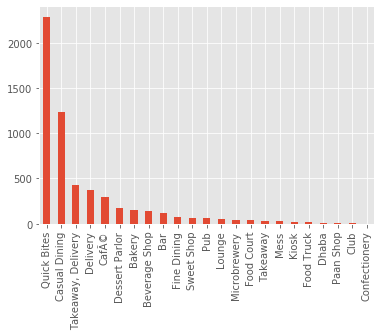

In [19]:
df["restaurant_category"].value_counts().plot.bar()

**Quick bites and Casual dining are the most common of all restaurant categories**

** **

<div class="span5 alert alert-info">
<b>
2. Most Unique cuisines
</b>    
</div>   

In [20]:
df['cuisines'] = df['cuisines'].apply(ast.literal_eval)

In [21]:
cuisines_series = df['cuisines'].apply(pd.Series).stack().reset_index(drop=True)

In [22]:
cuisines_series.value_counts(ascending = True)

 Hot dogs           1
German              1
 Parsi              1
 Belgian            1
Nepalese            1
                 ... 
 Fast Food        616
South Indian      730
 North Indian    1098
North Indian     1537
 Chinese         1694
Length: 175, dtype: int64

**Hot dogs,German are some of rare cuisines**

** **

<div class="span5 alert alert-info">
<b>    
3. Which locality has maximum restaurants which are in featured in 'newly opened'?
</b>    
</div>     

In [23]:
dffeatured = df.dropna(subset=['featured_in'])

In [24]:
dffeatured['featured_in'].apply(ast.literal_eval)

restaurant_ID
18903445                                 [Bengaluru's Finest]
19001666    [Microbreweries, Food Hygiene Rated Restaurant...
19098024    [European & Mediterranean, Insta-Worthy, Sunda...
57424                                    [Bengaluru's Finest]
19231655         [Pizza Time!, Rooftops, Corporate Favorites]
                                  ...                        
18701128                                  [Comfort In A Cup!]
18861643                 [Get flat 30% OFF, Get flat 40% OFF]
19032416                                        [Sweet Tooth]
56618                     [Great Buffets, Bengaluru's Finest]
19233516                                        [New on Gold]
Name: featured_in, Length: 739, dtype: object

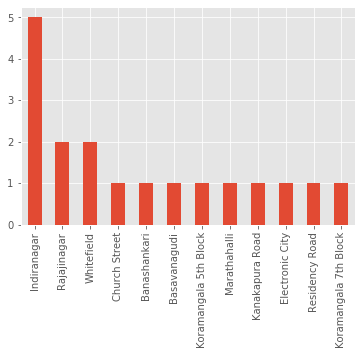

In [25]:
dffeatured["locality"][dffeatured['featured_in'].apply(lambda x: 'Newly Opened' in x)].value_counts().plot.bar()

**Indiranagar has the most restaurants featured under 'newly opened'.**  

** **  

<div class="span5 alert alert-info">
<b>    
4. Average cost of 2 for a restaurant category
</b>    
</div>     

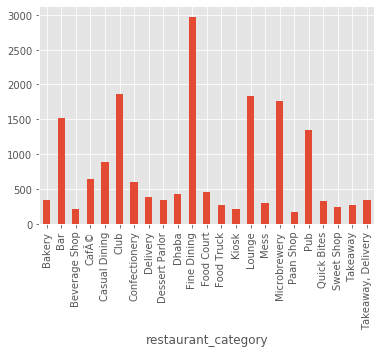

In [26]:
df.groupby("restaurant_category")['approx_cost_for_2'].mean().plot.bar()

**Fine dining category has the highest cost for 2 people.**

** **

<div class="span5 alert alert-info">
<b>    
5. Average restaurant rating in locality
</b>    
</div>     

In [27]:
df['rating'] = df['rating'].astype(float)

In [28]:
dfmeanratings = df.groupby("locality")['rating'].mean()
dfmeanratings.sort_values(ascending=False)

locality
Sankey Road              4.225000
Lavelle Road             4.143333
Church Street            4.095833
Race Course Road         4.084211
Koramangala 5th Block    4.061290
                           ...   
CV Raman Nagar           3.526087
Ejipura                  3.520000
Uttarahalli              3.515385
Bommanahalli             3.500000
City Market              3.476923
Name: rating, Length: 96, dtype: float64

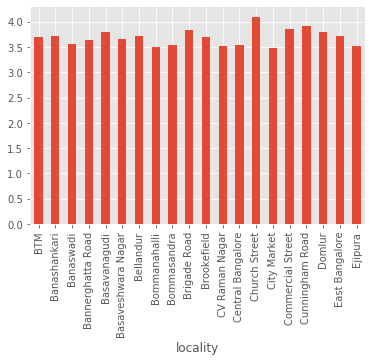

In [29]:
#Plotting avg rating of first 20 localities
dfmeanratingsTop20 = dfmeanratings[0:20]
dfmeanratingsTop20.plot.bar()

**Looking at the plot we can say the average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.** 

** **

<div class="span5 alert alert-info">
<b>    
6. Restaurant categories having highest and lowest ratings
</b>    
</div>    

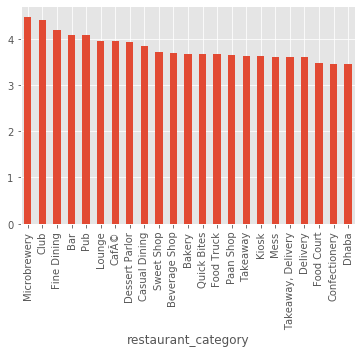

In [30]:
dfcatratings = df.groupby("restaurant_category")['rating'].mean()
dfcatratings.sort_values(ascending=False).plot.bar()

**Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

** **

<div class="span5 alert alert-info">
<b>    
7. To summarise,what is liked the most in top 2 restaurant categories.(Club, Microbreweries)
</b>    
</div>    

In [31]:
def combineFeatureText(series,exist=False):
    text = []
    for i in series.iteritems():
        for j in i:
            if type(j) is tuple:
                for k in j[1]:
                    if(exist):
                        if k not in text:
                            text.append(k)
                    else:
                        text.append(k)
                
    return text    

In [32]:
topCategories = ['Club','Microbrewery']
dfLikedInTopCat = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
dfLikedInTopCat['most_liked_Food'] = dfLikedInTopCat['most_liked_Food'].apply(ast.literal_eval)
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText,True)

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])
dfLikedInTopCat['most_liked_Service'] = dfLikedInTopCat['most_liked_Service'].apply(ast.literal_eval)
mostLikedServiceText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Service'].agg(combineFeatureText,True)

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])
dfLikedInTopCat['most_liked_Look & Feel']= dfLikedInTopCat['most_liked_Look & Feel'].apply(ast.literal_eval)
mostLikedLooknFeelText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Look & Feel'].agg(combineFeatureText,True)

mostLikedCombined = mostLikedFoodText + mostLikedServiceText + mostLikedLooknFeelText



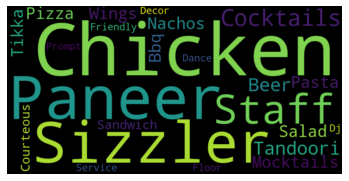

In [33]:
liked_text = ' '.join(review for review in mostLikedCombined["Club"])

wordcloud = WordCloud(width=800, height=400).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

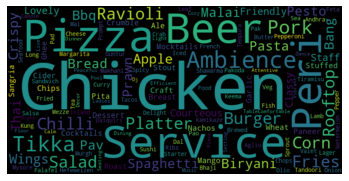

In [34]:
liked_text = ' '.join(review for review in mostLikedCombined["Microbrewery"])

wordcloud = WordCloud(width=800, height=400).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

** **

<div class="span5 alert alert-info">
<b> 
8. Exploring most liked food,service,look and feel in a most common restaurant category of a high rated restaurants.
</b>    
</div>    

In [35]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat1 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat1[dfLikedInTopCat1['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
dfLikedInTopCat['most_liked_Food'] = dfLikedInTopCat['most_liked_Food'].apply(ast.literal_eval)
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText,False)

cuisines_series = mostLikedFoodText.apply(pd.Series).stack().reset_index(drop=True)
cuisines_series.value_counts(ascending = False)

Mocktails               67
Cocktails               65
Pasta                   63
Pizza                   52
Fish                    52
                        ..
Mushroom Ramen           1
Peri Peri Wings          1
Steamed Chicken Momo     1
Bonda Soup               1
French Fries             1
Length: 543, dtype: int64

In [36]:
topCategories = ['Quick bites','Casual Dining']
dfLikedInTopCat2 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat2[dfLikedInTopCat2['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])
dfLikedInTopCat['most_liked_Service'] = dfLikedInTopCat['most_liked_Service'].apply(ast.literal_eval)
mostLikedServicedText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Service'].agg(combineFeatureText,False)

service_series = mostLikedServicedText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Friendly Staff       225
Courteous Staff      203
Prompt Service        86
Friendly Service      37
Courteous Service     36
Valet Service         29
Attentive Service      5
Cordial Staff          4
Efficient Service      3
Weekend Brunch         1
dtype: int64

In [88]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat3 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat3[dfLikedInTopCat3['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])
dfLikedInTopCat['most_liked_Look & Feel'] = dfLikedInTopCat['most_liked_Look & Feel'].apply(ast.literal_eval)
mostLikedlookFeelText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Look & Feel'].agg(combineFeatureText,False)

service_series = mostLikedlookFeelText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Decor                   202
Lovely Ambience          34
Rooftop Ambience         27
Live Music               26
Comfortable Seating      25
Cozy Place               20
Calm                     16
Cozy Ambience            16
Dj                       13
Live Grill               12
Rooftop Setting          11
Romantic Dinner           9
Cozy                      8
Peaceful Ambience         6
Classy Ambience           6
Classy Place              5
Pool Table                4
Vibrant Ambience          3
Candle Light Dinner       3
Dance Floor               3
Calm Ambience             3
Dhaba Feel                2
Cute Ambience             2
Live Cooking              2
Chinese Ambience          2
Comfortable Sofas         2
Outdoor Ambience          2
Instrumental Music        2
Wooden Decor              2
Board Games               2
Soothing Ambience         2
Peaceful Vibe             1
Rajasthani Ambience       1
Romantic Place            1
Peppy Music               1
Breakfast Joint     

** **

<div class="span5 alert alert-info">
<b>    
9. Insight on how Zomato Gold affects ratings of a particular restaurant category in any locality
</b>    
</div>    

In [37]:
dfZomato = df.groupby(['locality','restaurant_category','zomato_gold'])['rating'].mean()
dfZomato

locality       restaurant_category  zomato_gold
BTM            Bar                  zomato gold    3.600000
               Casual Dining        zomato gold    4.150000
               Dessert Parlor       zomato gold    4.400000
Banashankari   Casual Dining        zomato gold    3.700000
               Lounge               zomato gold    3.900000
                                                     ...   
Whitefield     Pub                  zomato gold    4.200000
Wilson Garden  Casual Dining        zomato gold    3.900000
Yelahanka      Casual Dining        zomato gold    4.033333
Yeshwantpur    Bar                  zomato gold    3.700000
               Casual Dining        zomato gold    3.833333
Name: rating, Length: 155, dtype: float64

In [38]:
dfNoZomato = df.groupby(['locality','restaurant_category'])['rating'].mean()
dfNoZomato

locality     restaurant_category
BTM          Bakery                 3.660000
             Bar                    3.600000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.805882
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 820, dtype: float64

locality     restaurant_category
BTM          Bakery                 3.660000
             Bar                    3.600000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.805882
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 820, dtype: float64

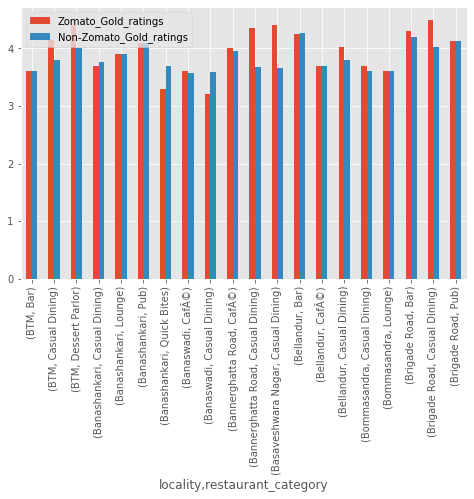

In [39]:
mergeddf = pd.merge(dfZomato,dfNoZomato,how ='left',on=['locality','restaurant_category'])
slicedMergeddf = mergeddf[0:20] #slice dataframe
ax = slicedMergeddf.plot.bar(figsize=(8,5))
ax.legend(["Zomato_Gold_ratings", "Non-Zomato_Gold_ratings"]);
dfNoZomato

**Considering a locality and restaurant category, zomato gold restaurants have better ratings.**

** **

<div class="span5 alert alert-info">
<b>    
10. Insight on Positive & negative sentiments on days of a week
</b>    
</div>    

In [40]:
df['reviews_new'] = df['reviews'].apply(ast.literal_eval)

In [41]:
review_series = df['reviews_new'].apply(pd.Series).stack().reset_index(drop=True)

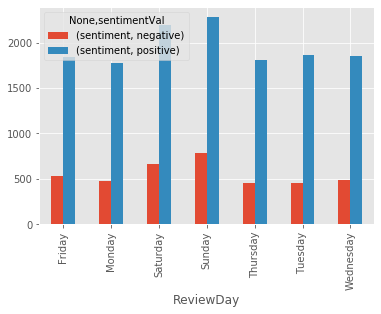

In [42]:
p = [i[0:3] for i in review_series]

cols = ["ReviewDay","Positive sentiment","Negative sentiment"]
for i,obj in enumerate(p):
    obj[0] = datetime.strptime(obj[0], '%Y-%m-%d %H:%M:%S').strftime('%A')
    
newDF = pd.DataFrame(p,columns=cols)

s = newDF.set_index("ReviewDay").unstack().reset_index()
df3 = s.set_axis(['sentiment', 'ReviewDay','sentimentVal'], axis=1, inplace=False)

df3 = df3[df3.sentimentVal != 'NA']
df4 = df3.groupby(['ReviewDay','sentimentVal']).count()
df4.unstack().plot(kind='bar')


**Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**

** **

<div class="span5 alert alert-info">
<b> 
Exploring correlations between variables.
</b>
</div>

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new'],
      dtype='object')

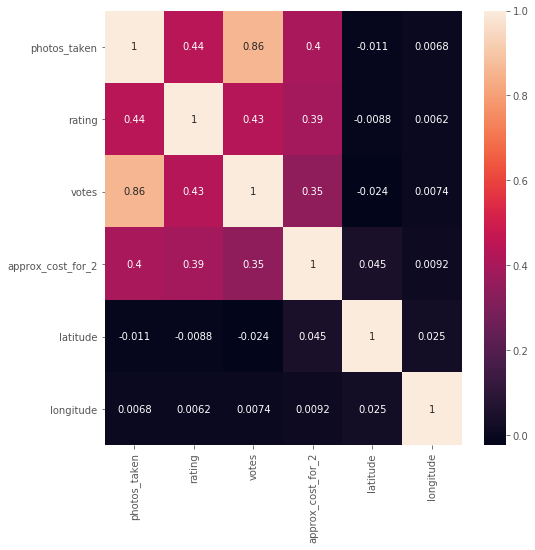

In [43]:
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

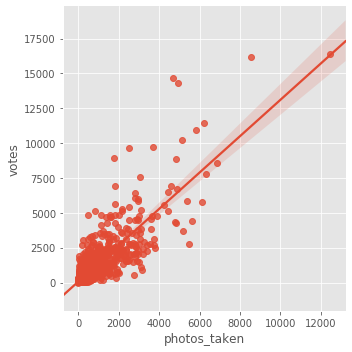

In [44]:
sns.lmplot('photos_taken','votes',data=df)

**Photos taken and votes have highest correlation.** 

<div class="span5 alert alert-info">
<b>
Converting features to numerical data for exploring more correlations.
</b>
</div>    

In [45]:
#Creating a new copy of dataframe

dfm = df.copy()

In [49]:
#Adding some features

In [46]:
#encoding categorical variables

from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df

In [47]:
# grouping restaurant categories and localities having low count to a 'other' category

dfm = dfm.apply(lambda x: x.mask(x.map(x.value_counts()) < 20, 'other') if x.name == 'restaurant_category' else x)
dfm = dfm.apply(lambda x: x.mask(x.map(x.value_counts()) < 20, 'other') if x.name == 'locality' else x)

In [48]:
# Label encoding Locality and restaurant category

cols = ['locality','restaurant_category']        
o_df = Categorical_encoding(dfm,cols)  
dfm = o_df.label_encoding()

In [49]:
dfm["featured_in_count"] = dfm["featured_in"].apply(lambda x: len(ast.literal_eval(x)) if x is not np.nan else x)
dfm["featured_in_count"]

restaurant_ID
18263397    NaN
18162878    NaN
18656621    NaN
18989392    NaN
19021430    NaN
           ... 
18313519    NaN
18923557    NaN
18783421    NaN
55428       NaN
19233516    1.0
Name: featured_in_count, Length: 5637, dtype: float64

In [50]:
# converting to numerics

dfm["zomato_gold"] = dfm["zomato_gold"].apply(lambda x: 1 if x == 'zomato gold' else 0)
dfm["discounts"] = dfm["discounts"].apply(lambda x: 1 if x is not np.nan else 0)

In [51]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def LabelBinarizerEncoding(categoricalList,colSubset = []):
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(categoricalList),columns = mlb.classes_,index = categoricalList.index)
    return res


In [52]:
# famousCuisines = ['Chinese','North Indian','South Indian','Fast Food']
# famousMostLikedFood = ['Biryani','Pasta','Fish','Mocktails','Salad']
# famousService = ['Friendly Staff','Courteous Staff','Prompt Service']
# famousLookFeel = ['Decor','Rooftop Ambience','Live Music']

famousCuisines = ['Chinese','North Indian','South Indian','Fast Food']
famousMostLikedFood = ['Cocktails','Mocktails','Pizza','Pasta']
famousService = ['Friendly Staff','Courteous Staff']
famousLookFeel = ['Decor']

dfcuisinesbin = LabelBinarizerEncoding(dfm['cuisines'])
dfcuisinesbin_ = dfcuisinesbin[famousCuisines]

dfm["most_liked_Food"] = dfm["most_liked_Food"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedFoodbin = LabelBinarizerEncoding(dfm['most_liked_Food'])
dfostLikedFoodbin_ = dfostLikedFoodbin[famousMostLikedFood]

dfm["most_liked_Service"] = dfm["most_liked_Service"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedServicebin = LabelBinarizerEncoding(dfm['most_liked_Service'])
dfostLikedServicebin_ = dfostLikedServicebin[famousService]

dfm["most_liked_Look & Feel"] = dfm["most_liked_Look & Feel"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedLookFeelbin = LabelBinarizerEncoding(dfm['most_liked_Look & Feel'])
dfostLikedLookFeelbin_ = dfostLikedLookFeelbin[famousLookFeel]


In [53]:
def addbinarisedCols(binariseddf,colsFilterList):
    for i in range(len(colsFilterList)):
        dfm[colsFilterList[i]] = binariseddf[colsFilterList[i]]

addbinarisedCols(dfcuisinesbin_,famousCuisines)
addbinarisedCols(dfostLikedFoodbin_,famousMostLikedFood)
addbinarisedCols(dfostLikedServicebin_,famousService)
addbinarisedCols(dfostLikedLookFeelbin_,famousLookFeel)

dfm.head(3)

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,North Indian,South Indian,Fast Food,Cocktails,Mocktails,Pizza,Pasta,Friendly Staff,Courteous Staff,Decor
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18263397,https://www.zomato.com/bangalore/al-fanar-rt-n...,Al Fanar,53,15,0,0,14,3.8,66.0,"[Biryani, North Indian, Chinese]",...,0,0,0,0,0,0,0,0,0,0
18162878,https://www.zomato.com/bangalore/eat-n-meet-bo...,Eat N Meet,8,15,0,0,23,2.7,178.0,"[Kerala, South Indian, North Indian, Chines...",...,0,0,0,0,0,0,0,0,0,0
18656621,https://www.zomato.com/bangalore/balaji-bombay...,Balaji Bombay Vada Pav Gujrati Dalebi,24,18,0,0,1,3.7,51.0,"[Street Food, Sandwich]",...,0,0,0,0,0,0,0,0,0,0


Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new', 'featured_in_count', 'Chinese',
       'North Indian', 'South Indian', 'Fast Food', 'Cocktails', 'Mocktails',
       'Pizza', 'Pasta', 'Friendly Staff', 'Courteous Staff', 'Decor'],
      dtype='object')

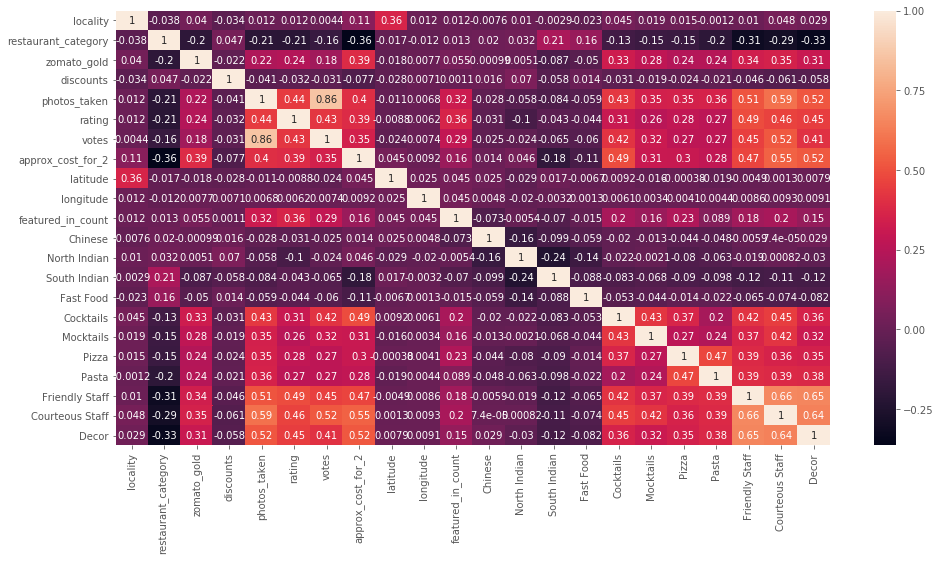

In [61]:
corr = dfm.corr(method='pearson')
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
dfm.columns

In [54]:
#for further analysis
dfm.to_csv("zomato_clean_data_csv/zomato_reduced_data"+".csv",index=False)

** **

<div class="span5 alert alert-info">
<b>
Summarising the insights:
</b>
</div>

<div class="span5 alert alert-info">
<b>
Insights from Descriptive Analysis:
</b>
</div>    

**1. Quick bites and Casual dining are the most common of all restaurant categories.**

**2. Singaporean,Indonesian are some of rare cuisines.**

**3. Indiranagar has the most restaurants featured under 'newly opened'.**

**4. Fine dining category has the highest cost for 2 people.**

**5. The average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.**

**6. Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

**7. Mocktails,cocktails,pasta,friendly staff,courteous staff ,decor,lovely ambience,rooftop ambience are some of the most liked things in most common restaurant categories.**

**8. Paneer,Chicken,Sizzler,Staff,Peri,Service,Pizza,Ambience,Beer are some of the most liked things in top rated restaurant categories.**

**9. Considering a locality and restaurant category, zomato gold restaurants have better ratings.**

**10. Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**


<div class="span5 alert alert-info">
<b>
Insights from correlations:
</b>
</div>    

**1. There is high positive correlation between photos_taken and votes.**

**2. Features like photos_taken,votes,approx_cost_for_2,featured_in_count,zomato_gold tend to have positive correlation with restaurant rating.**

**3. Discounts have a negative correlation with ratings.**  

For further statistical inference

https://github.com/Anandpatil412/DSC/blob/master/CapstoneProject1/Zomato/Statistical_Inference.ipynb